This script creates Figure 2-1 within the Trends Indicator Memorandum

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import sklearn
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

The below file is the indicator data transposed with just data points

In [2]:
df = pd.read_csv('C:/Users/zapate/Documents/FHWA-Mobility-Trends-main/FHWA-Mobility-Trends-main/Year1/Modeling/Data/All_indicators.csv')
df

,year,VMT,TransitModeShare,TransportGHG,Population,Unemployment Rate 1,Unemployment Rate 2,Unemployment Rate Metro,Unemployment Rate Non-Metro,Unemployment Rate White,Unemployment Rate Asian,Unemployment Rate Black,Unemployment Rate Hispanic,Unemployment Rate Women,Unemployment Rate Men,TotLaneMiles,TotUrbanMiles,TotRuralMiles,TotLocToCollMiles,TotalArtToFwyMiles,MilesofSpecialtyLanes,TransitTotOpFunding,TransitTotCapFunding,TransitTotFunding,TransitActiveFleet,TransitSumAvgSeatCap,TransitSumAvgStandCap,TransitTotCapacity,TransitDRM,TransitPMT,TransitVRM,TransitVRH,TransitUPT,TransitNumAgencies,RegisteredBEVCarsMillions,RegisteredBEVTrucksMillions,%RegisteredBEVCars,%RegisteredBEVTrucks,EVSalesHybridElec,EVSalesHybridElecPlugin,EVSalesElectric,EVSalesHybridElec%allsales,EVSalesHybridElecPlugin%allsales,EVSalesElectric%allsales,EVPrivateandPublicEVSEPorts,EVPrivateandPublicChargingStationLocations,BEVRangeMedian,BEVRangeMaximum,%populationTelework,%UrbanTelework,%TeleworkwInternetAccess,%TeleworkwBroadbandorHighSpeedInternet,%TeleworkCollegeGraduates,%TeleworkHighSchoolDiplomaorGED,%TeleworkNoHighSchoolDiploma,%TeleworkLowIncome,%TeleworkNonLowIncome
0,2000,2.764480e+12,0.047,1913.551,282162411,3.966667,3.994293,3.888735,4.591850,3.483333,3.625000,7.566667,5.716667,4.083333,3.891667,8224245.000,1915503.000,6308742.000,7019108.000,1205137.000,0,21971358149,9055908941,31027267090,105949,34195.23911,8352.651527,4779633.052,208116.60,45100241891,3202354371,215690522,8719890910,1087,0.00,0.00,0.0000,0.0000,9350,0,0,0.000627,0.000000,0.000000,0,558,0.0,0,0.033000,0.000000,0.032389,0.032167,0.039951,0.028503,0.026320,0.000000,0.000000
1,2001,2.813420e+12,-,1885.435,284968955,4.741667,4.734594,4.623503,5.367381,4.150000,4.458333,8.600000,6.566667,4.666667,4.808333,8251865.000,1967044.000,6284821.000,7042842.000,1209023.000,0,23724633863,10824642675,34549276538,110284,34773.59126,8440.777050,4939950.886,214185.30,46507533027,3319014751,222962086,9007786295,1109,0.00,0.00,0.0000,0.0000,20282,0,0,0.001411,0.000000,0.000000,0,693,0.0,0,0.033785,0.000000,0.033846,0.033799,0.040621,0.029350,0.026670,0.000000,0.000000
2,2002,2.873610e+12,-,1925.981,287625193,5.783333,5.787607,5.735012,6.088191,5.116667,5.891667,10.225000,7.533333,5.616667,5.925000,8295170.000,2006435.000,6288735.000,7078629.000,1216541.000,0,24791605553,12305022178,37096627731,114102,35119.15581,18015.325690,6525944.664,241009.50,46096858641,3433920231,230338393,9017976117,1127,0.00,0.00,0.0000,0.0000,36042,0,0,0.002606,0.000000,0.000000,0,873,0.0,0,0.034453,0.000000,0.034408,0.034604,0.042526,0.029138,0.027839,0.000000,0.000000
3,2003,2.908780e+12,-,1933.327,290107933,5.991667,5.982907,5.913628,6.378680,5.241667,5.975000,10.808333,7.658333,5.666667,6.283333,8315121.000,2108650.000,6206471.000,7086697.000,1228424.000,0,25989597551,12775072145,38764669696,115691,35295.21742,18666.156960,6508957.461,234824.10,45676831126,3475956828,234302206,8876036081,1150,0.00,0.00,0.0000,0.0000,47566,0,0,0.003488,0.000000,0.000000,0,830,0.0,0,0.034931,0.030519,0.034860,0.034804,0.043288,0.029333,0.026417,0.027787,0.028603
4,2004,2.982020e+12,0.046,1965.852,292805298,5.541667,5.527339,5.441148,6.023480,4.833333,4.416667,10.383333,6.975000,5.408333,5.633333,8338821.000,2199155.000,6139666.000,7090633.000,1248188.000,0,27350936661,12629086894,39980023555,120039,35722.52981,18990.818720,6786696.206,226405.40,46545783080,3547881216,239892462,8937072091,1170,0.00,0.00,0.0000,0.0000,84233,0,0,0.006069,0.000000,0.000000,0,671,0.0,0,0.038000,0.032532,0.038512,0.038513,0.048296,0.031522,0.029042,0.026343,0.032479
5,2005,3.009220e+12,0.046599785,1975.495,295516599,5.083333,5.100061,4.990439,5.732538,4.375000,3.983333,10.000000,6.008333,5.100000,5.058333,8371718.000,2263360.000,6108358.000,7106775.000,1264943.000,0,29087643854,11836673423,40924317277,122464,36538.87798,19386.351110,7022745.998,236921.80,47121091562,3601988425,241003583,9175124398,1198,0.00,0.00,0.0000,0.0000,205876,0,0,0.014683,0.000000

In [3]:
df.dtypes

year                                            int64
VMT                                           float64
TransitModeShare                               object
TransportGHG                                  float64
Population                                      int64
Unemployment Rate 1                           float64
Unemployment Rate 2                           float64
Unemployment Rate Metro                       float64
Unemployment Rate Non-Metro                   float64
Unemployment Rate White                       float64
Unemployment Rate Asian                       float64
Unemployment Rate Black                       float64
Unemployment Rate Hispanic                    float64
Unemployment Rate Women                       float64
Unemployment Rate Men                         float64
TotLaneMiles                                  float64
TotUrbanMiles                                 float64
TotRuralMiles                                 float64
TotLocToCollMiles           

Imputing data for transit mode share until we fill it in. I perform a straight-line imputation for simplicity, but we could do some more complex imputation form such as regression, etc.

In [4]:
transit_mode_share = df['TransitModeShare']
transit_mode_share_list = transit_mode_share.to_list()
transit_mode_share

0           0.047
1               -
2               -
3               -
4           0.046
5     0.046599785
6     0.048341925
7     0.048833315
8     0.050070944
9     0.049948293
10    0.049427567
11    0.050307218
12    0.050073178
13    0.051714018
14    0.052103661
15    0.052324234
16    0.050866834
17     0.04998143
18          0.049
19    0.049562746
Name: TransitModeShare, dtype: object

In [5]:
#grab 0th and 4th index, straight line between them
transit_mode_zero, transit_mode_four = transit_mode_share_list[0], transit_mode_share_list[4]
#straight line impute
diff = float(transit_mode_four) - float(transit_mode_zero)
step_size = diff / 4
transit_mode_share_list[1], transit_mode_share_list[2], transit_mode_share_list[3] = float(transit_mode_zero) + step_size,   \
                                                                                    float(transit_mode_zero) + (2*step_size),\
                                                                                    float(transit_mode_zero) + (3*step_size)
df['TransitModeShare'] = transit_mode_share_list
df = df.astype({'TransitModeShare': float})

Imputing data for ev charging station ports: While # EV charging locations has been collected over the entire sample size, EV ports was only started counting later. Here, we create the average ratio between EVSE Ports and charging station locations to impute the early yeras where port number was not collected

In [6]:
charginglocations, evports = df['EVPrivateandPublicChargingStationLocations'].to_list(), df['EVPrivateandPublicEVSEPorts'].to_list()

def get_division():
    ratios = []
    for i in range(len(charginglocations)):
        if evports[i] == 0:
            pass
        else:
            ratios.append(evports[i] / charginglocations[i])
    return ratios
    
    
ratios = get_division()
print(np.average(ratios))

for i in range(len(evports)):
    if evports[i] == 0:
        evports[i] = np.average(ratios) * charginglocations[i]

df['EVPrivateandPublicEVSEPorts'] = evports

2.5899286936646537


Write this imputed data to csv for easier usage

In [7]:
df.to_csv('imputated_data1212.csv')

## Initial Figures

The below figures are created to show collinearity and distributions of the raw data. 

As most indicators trend in the upward direction, we see that most indicators except unemployment rate is correlated. unEmployment itself also moves together, despite being broken out by different factors.

<AxesSubplot:>

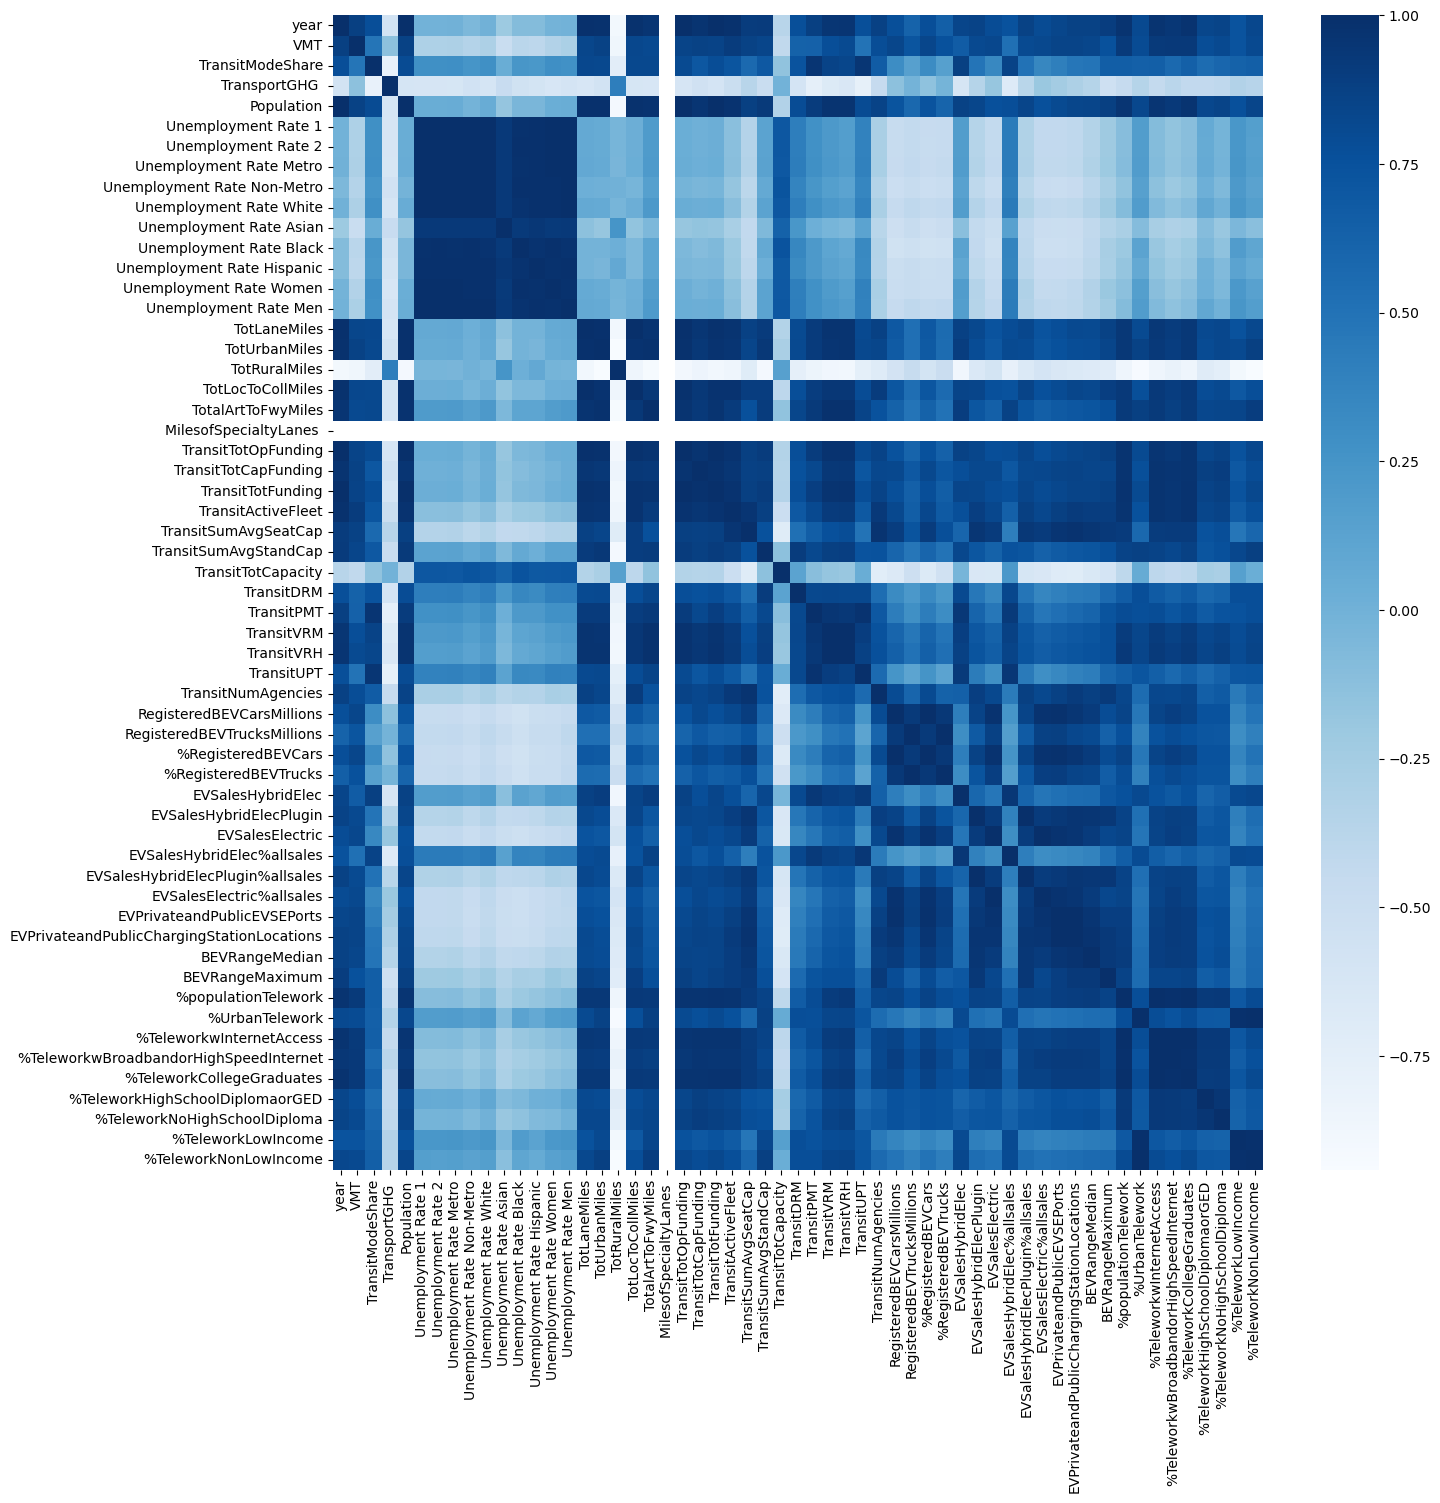

In [8]:
#correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 
